In [1]:
import os
import pandas as pd
import numpy as np
from scipy.io import mmread
import scipy.sparse as sp
import matplotlib.pyplot as plt
from IPython.display import Image
import scanpy as sc
import seaborn as sn

In [2]:
ngenes = 1500

In [3]:
patients = [f[5:-5] for f in os.listdir('adata')]

In [4]:
# evaluate each gene's moran's I by patient
all_Is = []
all_Ds = []
for patient in patients:
    adata = sc.read('adata/adata%s.h5ad'%patient)
    
    all_Is.append( pd.DataFrame({patient : adata.uns['moranI']['I']}) )
    
I = pd.concat(all_Is, axis=1, join='outer')
I_stats = pd.DataFrame({'median':I.median(axis=1), 'sd':I.std(axis=1)})

<AxesSubplot: xlabel='median', ylabel='sd'>

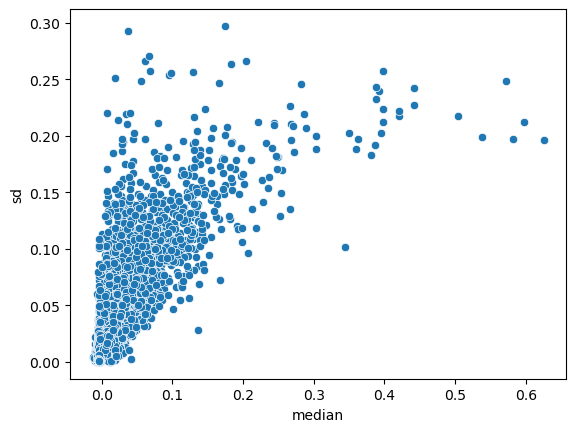

In [5]:
sn.scatterplot(data=I_stats, x='median',y='sd')

In [6]:
# select genes to use
genes = I_stats.sort_values(by='median',ascending=False).index[0:ngenes]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa299481700>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa299481c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa299481460>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa28928f1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa28928f460>],
 'means': []}

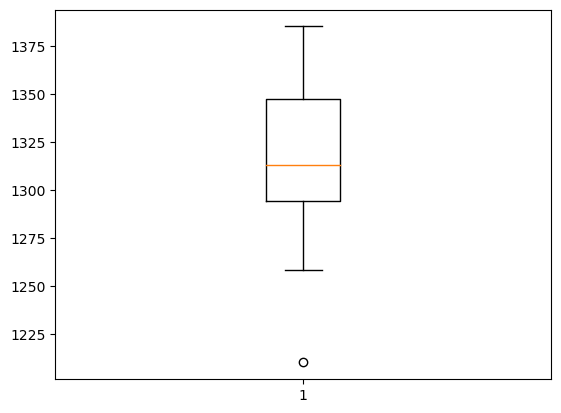

In [7]:
# find the overlap of these genes in each patient sample
n_genes = np.zeros([len(patients),1])
for i,patient in enumerate(patients):
    adata = sc.read('adata/adata%s.h5ad'%patient)
    n_genes[i] = len(adata.var.index.intersection(genes))
    
plt.boxplot(n_genes)

In [13]:
pd.DataFrame(genes).to_csv('cnmf_genes.csv', index=False, header=False)